In [1]:
# importing sys
import sys
  
# adding srcpy to the system path
sys.path.insert(0, r"\DSP\20221\srcpy")

import data_proc, feature_proc

# Auto reload: watch a directory for changed files and restarts a process when the change is detected
%load_ext autoreload
%autoreload 2

import random
import numpy as np
import pandas as pd
pd.options.display.max_columns = None
pd.options.mode.chained_assignment = None
pd.options.display.float_format

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
mpl.style.use("ggplot")
pylab.rcParams["figure.figsize"] = 8 , 6

import seaborn as sns
sns.set_style("white")

from pandas_profiling import ProfileReport

c:\Users\ThuHuyen\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\ThuHuyen\AppData\Local\Temp\ipykernel_2376\476212504.py:29: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
df= data_proc.load_training_data(r"\DSP\20221\data\zillow.csv")
data_proc.rename_columns(df)


In [9]:
# Maps 
import plotly.express as px
import pandas as pd

color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(df, 
                        lat="lat", 
                        lon="long", 
                        color_continuous_scale=color_scale,
                        zoom=8, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

# Process outliers, OOD, missing

In [4]:
#report = ProfileReport(df, title = "Report Zillow")
#report.to_notebook_iframe()
#report.to_file("Report_Zillow_processP1.html")

## Continous

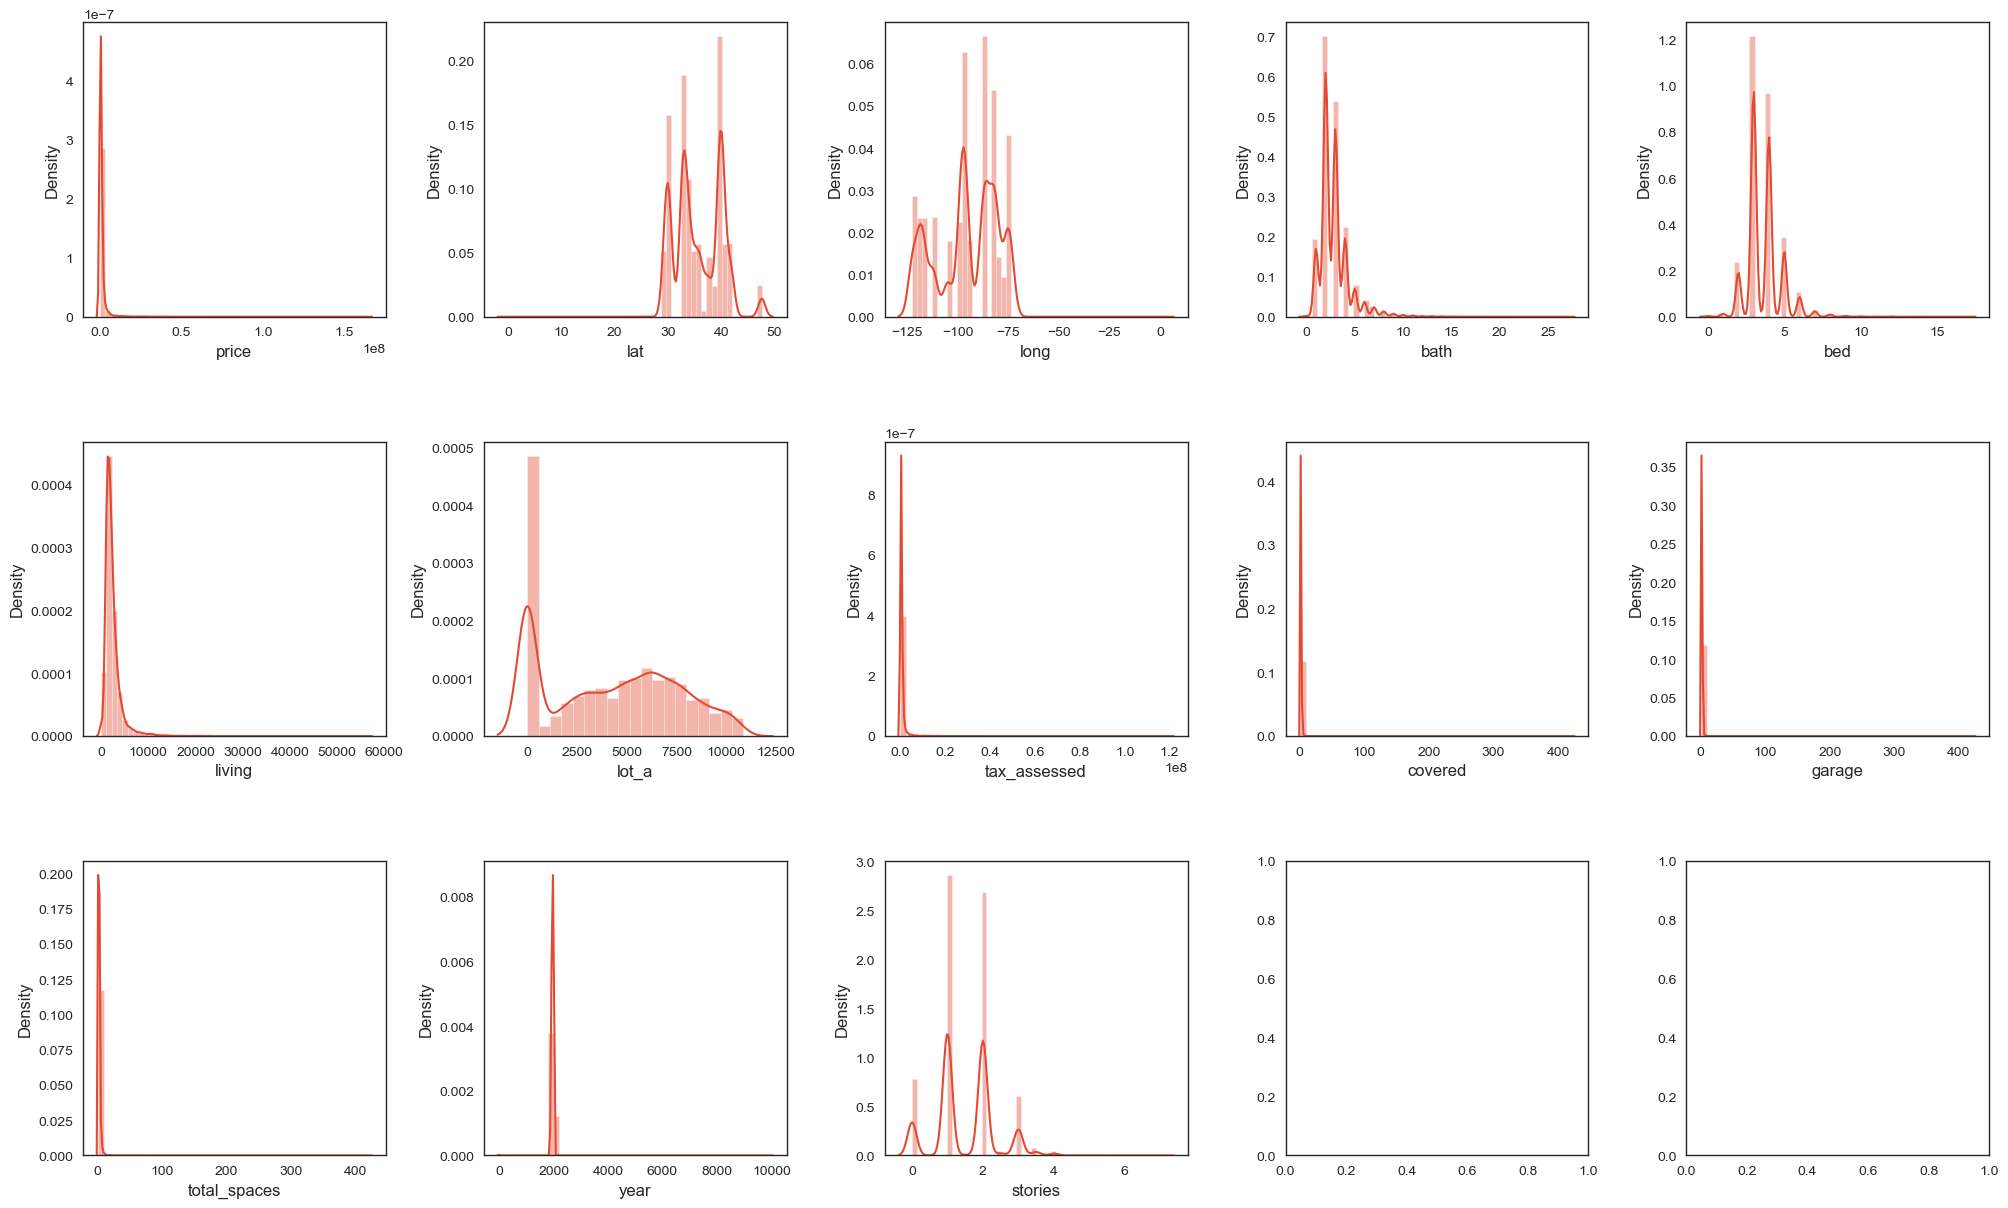

In [5]:
# Destiny
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

fig, axs = plt.subplots(nrows = 3, ncols = 5, figsize=(20, 12))
index = 0
axs = axs.flatten()
for k,v in df.select_dtypes(include=["number"]).items():
    sns.distplot(v, ax=axs[index])
    index += 1
    if index == 13:
        break
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show();

In [6]:
df.select_dtypes(include=["number"]).columns

Index(['price', 'lat', 'long', 'bath', 'bed', 'living', 'lot_a',
       'tax_assessed', 'covered', 'garage', 'total_spaces', 'year', 'stories'],
      dtype='object')

### price 

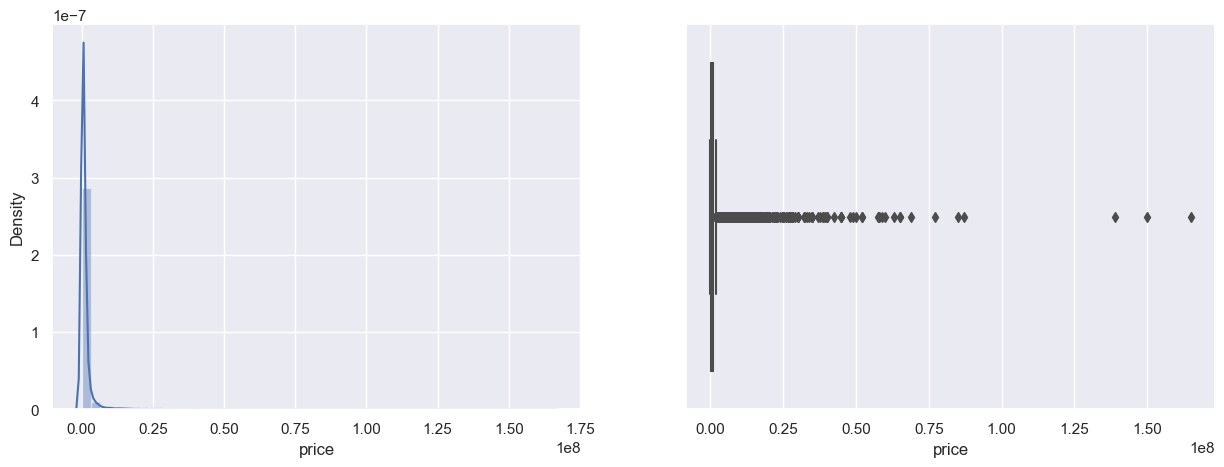

In [7]:
# Box Plot 

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Total Room Visualize 
import seaborn as sns
sns.set_theme()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.distplot(df["price"],  ax=axs[0]);
sns.boxplot(df["price"],  ax=axs[1]);

In [8]:
df["price"].describe()

count    1.326500e+04
mean     1.246741e+06
std      4.107916e+06
min      0.000000e+00
25%      3.088880e+05
50%      5.030000e+05
75%      9.850000e+05
max      1.650000e+08
Name: price, dtype: float64

In [9]:
from typing import Tuple
from sklearn.base import BaseEstimator, TransformerMixin

def find_boxplot_boundaries(df_col):
    Q1 = df_col.quantile(0.25)
    Q3 = df_col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR   # ≥ 0 for this feature
    upper = Q3 + 1.5 * IQR
    return lower, upper

# OOP Inheritance
class BoxplotOutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.lower = None
        self.upper = None

    def fit(self, df_col):
        self.lower, self.upper = find_boxplot_boundaries(df_col)
        return self

    def transform(self, df_col):
        return df_col.clip(self.lower, self.upper)

In [10]:
find_boxplot_boundaries(df["price"])

(-705280.0, 1999168.0)

In [11]:
# Limit price 2.000.000
df = df[df['price'] <= 1000000]
  
# Print the shape of the dataframe
print(len(df))

10137


### bath & bed

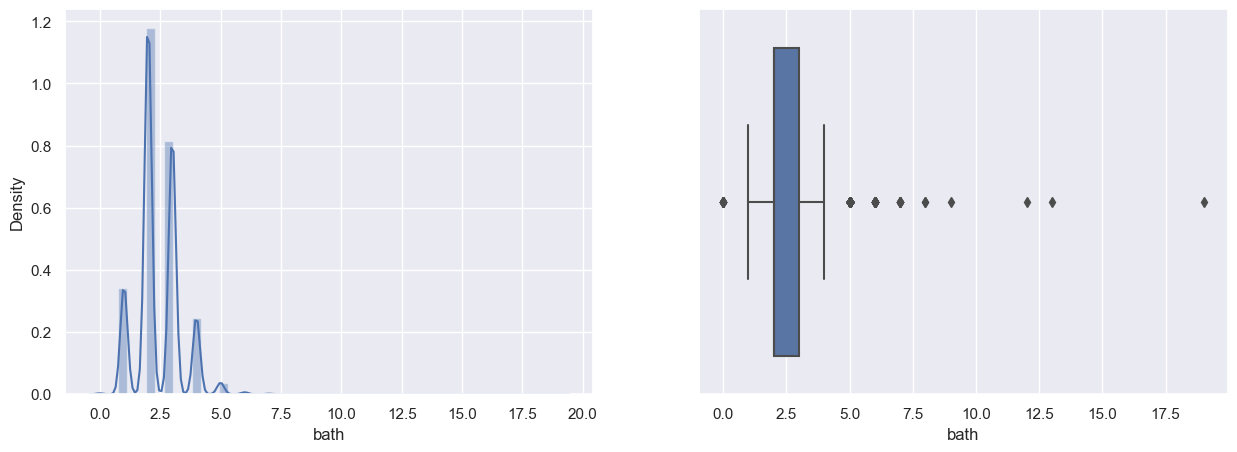

In [12]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.distplot(df["bath"],  ax=axs[0]);
sns.boxplot(df["bath"],  ax=axs[1]);

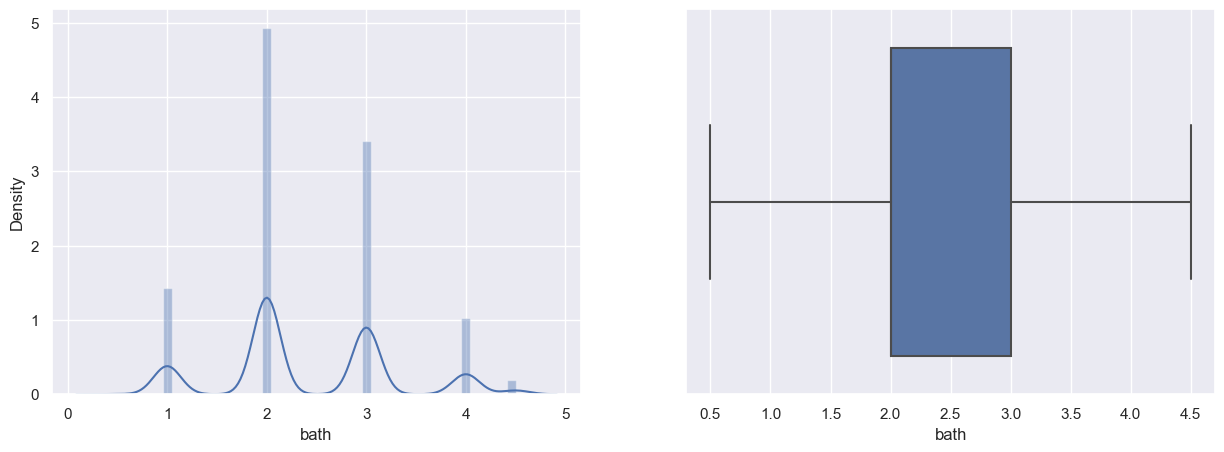

In [13]:
#clipped_total_rooms = BoxplotOutlierClipper().fit(df_housing["total_rooms"]).transform(df_housing["total_rooms"])
clipped_bath = BoxplotOutlierClipper().fit_transform(df["bath"])

# Plot new data (clipped)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.distplot(clipped_bath, ax = axs[0])
sns.boxplot(clipped_bath, ax = axs[1]);

# convert to df
df["bath"] = clipped_bath

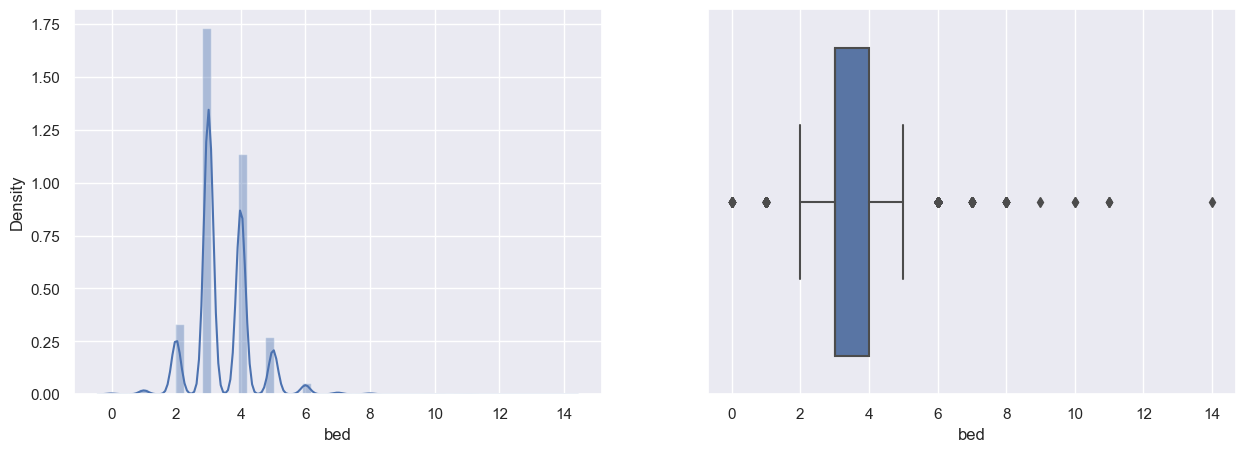

In [14]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.distplot(df["bed"],  ax=axs[0]);
sns.boxplot(df["bed"],  ax=axs[1]);

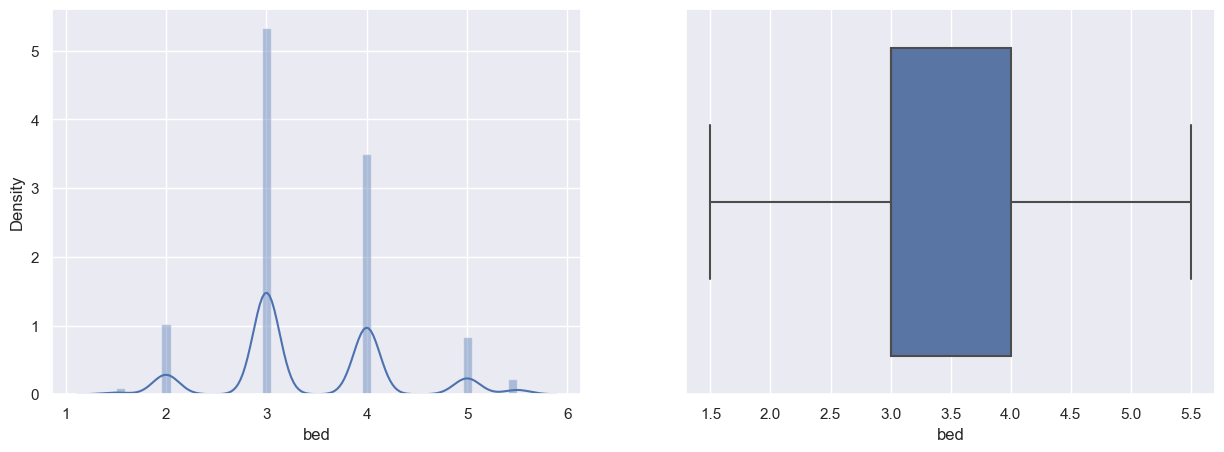

In [15]:
#clipped_total_rooms = BoxplotOutlierClipper().fit(df_housing["total_rooms"]).transform(df_housing["total_rooms"])
clipped_bed = BoxplotOutlierClipper().fit_transform(df["bed"])

# Plot new data (clipped)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.distplot(clipped_bed, ax = axs[0])
sns.boxplot(clipped_bed, ax = axs[1]);

df["bath"] = clipped_bed

### living

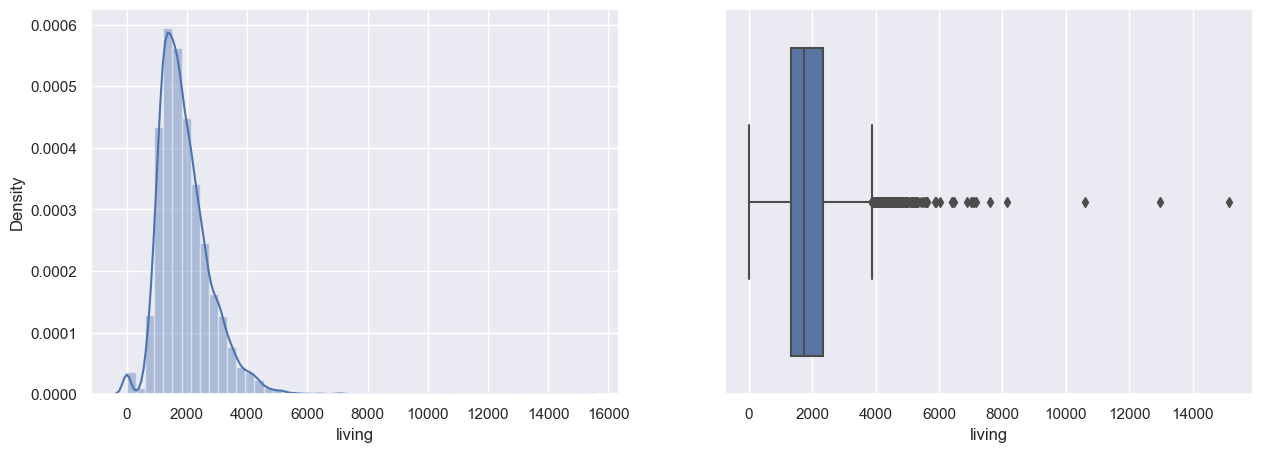

In [16]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.distplot(df["living"],  ax=axs[0]);
sns.boxplot(df["living"],  ax=axs[1]);

In [17]:
df = df[df['living'] <= 8000]
  
print(len(df))

10133


### tax 

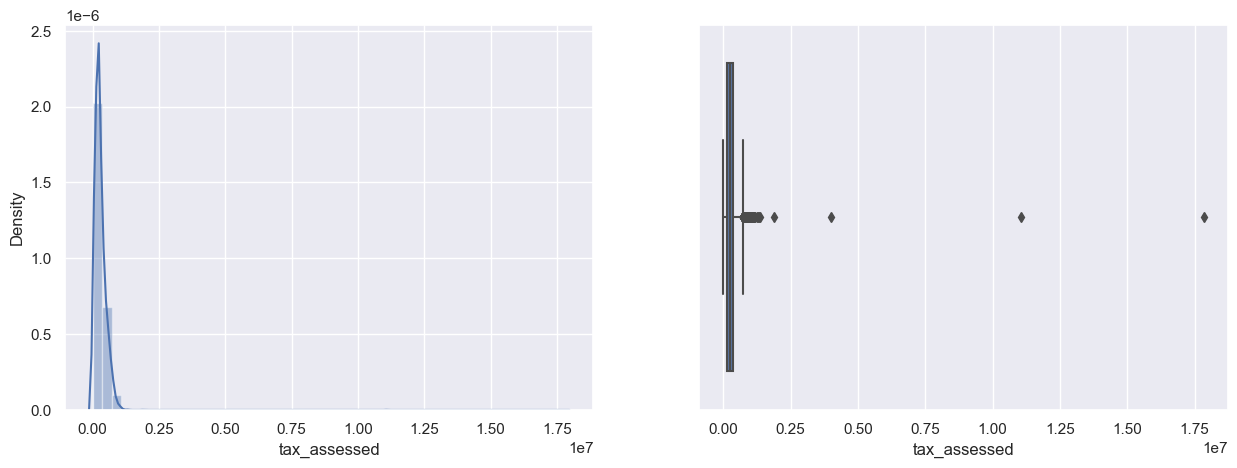

In [18]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.distplot(df["tax_assessed"],  ax=axs[0]);
sns.boxplot(df["tax_assessed"],  ax=axs[1]);

In [19]:
df = df[df['tax_assessed'] <= 2500000]
  
print(len(df))

10130


### covered

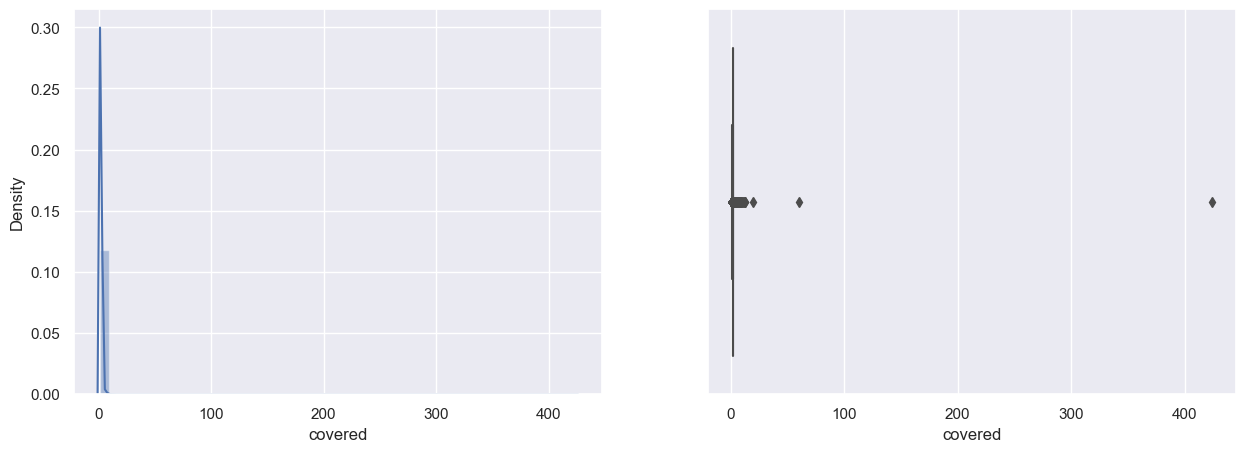

In [20]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.distplot(df["covered"],  ax=axs[0]);
sns.boxplot(df["covered"],  ax=axs[1]);

In [21]:
find_boxplot_boundaries(df["covered"])

(1.3874999999999997, 2.3675)

In [22]:
df = df[df['covered'] <= 5]
  
print(len(df))

10075


### garage

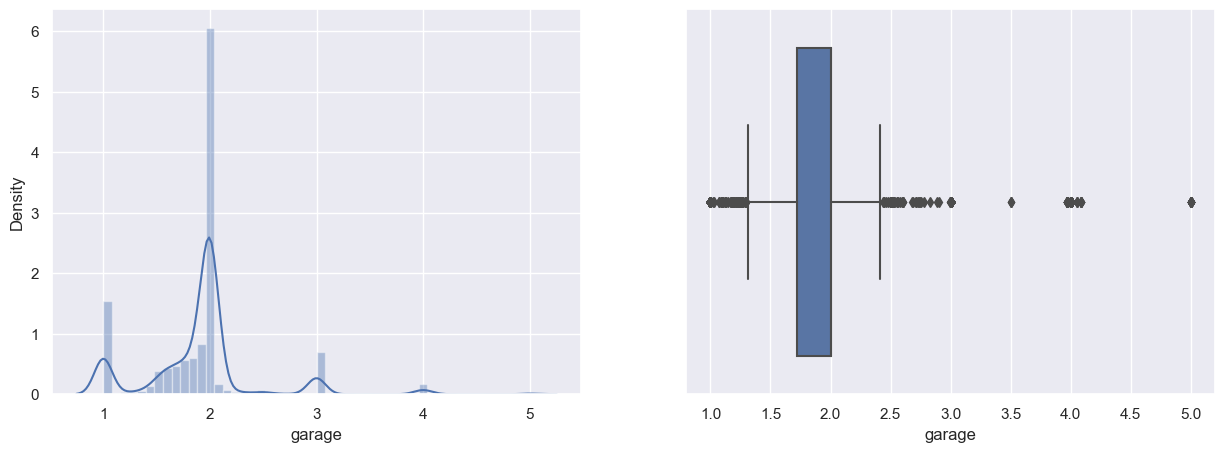

In [23]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.distplot(df["garage"],  ax=axs[0]);
sns.boxplot(df["garage"],  ax=axs[1]);

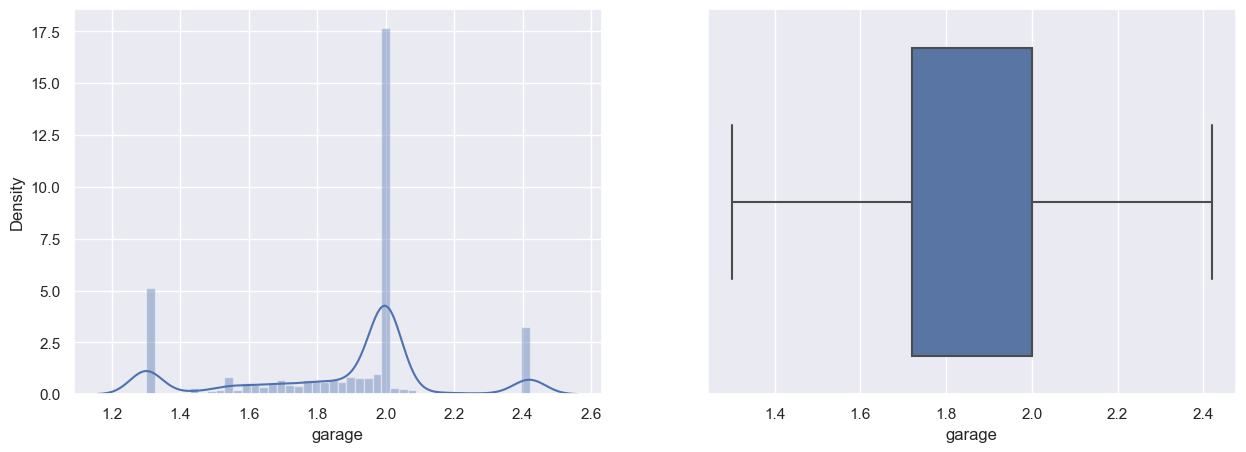

In [24]:
clipped_garage = BoxplotOutlierClipper().fit_transform(df["garage"])

# Plot new data (clipped)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.distplot(clipped_garage, ax = axs[0])
sns.boxplot(clipped_garage, ax = axs[1]);

df["garage"] = clipped_garage

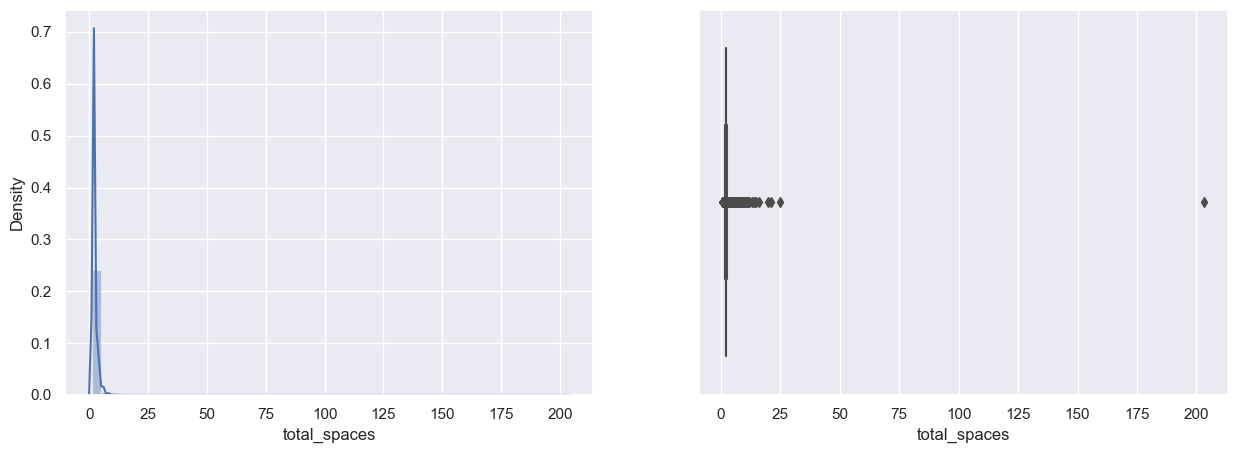

In [25]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.distplot(df["total_spaces"],  ax=axs[0]);
sns.boxplot(df["total_spaces"],  ax=axs[1]);

## Categorical

### fireplace 

In [26]:
df["fireplace"].unique()

array(['none', 'pellet stoven', 'wood burning stoven', '1.0',
       'family room', 'living room', 'non', 'decorative', 'see remarks',
       'great room', 'gas', 'dining room', 'electric', '2.0',
       'rairsed heart', 'wood burning', 'outside', 'game room', 'den',
       'fire pit', '4.0', '3.0', '5.0', '7.0', '6.0', '9.0',
       'other (see remarks)', 'free standing', 'fire pi', 'see through',
       'marble', 'gas/propane', 'decorativ', 'free standin', 'insert',
       'other', 'brick', 'not applicable', 'three', 'gas starte', 'bat',
       '1 fireplace', '2 or more fireplaces', 'brick fireplace',
       'family room/den/great room', '2 or more fireplace',
       'family room/den/great roo', 'tile fireplace', 'stone fireplace',
       'de', 'vente', 'primary bedroom', 'gas log', 'bonus room',
       'ventles', 'ventless', 'keeping room', 'vented', 'kitchen',
       'hearth room', 'wood burnin', 'other logcatio', '2+ fireplace',
       'basemen', 'basement', 'glass door'], dtype=o

In [27]:
def cus_fireplace(df):
    for i in list(df.index):
        if df.at[i, "fireplace"] in ["none", "1 fireplace"]:
            df.at[i, "fireplace"] = int(1)
        elif df.at[i, "fireplace"] == ["not applicable", "non"]:
            df.at[i, "fireplace"] = int(0)
        elif df.at[i, "fireplace"] in ["0.0",'1.0', '2.0', '3.0', '4.0', '5.0', '7.0', '6.0', '9.0', '8.0']:
            df.at[i, "fireplace"] = int(float(df.at[i, "fireplace"]))
        elif df.at[i, "fireplace"] in ["2 or more fireplaces", "2 or more fireplace"]:
            df.at[i, "fireplace"] = int(2)
        elif df.at[i, "fireplace"] in ["2+ fireplace", "three"] :
            df.at[i, "fireplace"] = int(3)
        else:
            df.at[i, "fireplace"] = int(1)
    return df

cus_fireplace(df).head()
df["fireplace"] = df["fireplace"].astype("int16")

### drop city 

### parking

In [28]:
df["parking"].unique()

array(['Garage - Detached', 'none', 'Detache', 'Garage - Attached',
       'Community Driv', 'Privat', 'No Garag', 'Shared Driv', 'None',
       'Off-street', 'Garage - Detache', 'Carport', 'Carpor',
       'Off Street', 'Non', 'No Garage', 'Private Driv', 'On Street',
       'Attache', 'Built-i', 'Garage - Attache', 'Off-stree', 'Driveway',
       'Shared Drivewa', 'Garage', 'On-street', 'Drivewa', 'Commo',
       'Stree', 'Public Parkin', 'Othe', 'Other', 'Off Sit',
       'Direct Acces', 'Attached', 'Attached Carpor',
       'Garage - Single Door', 'Driveway Gat', 'Garage Is Attache',
       'Garage Is Detached', 'Garage - Two Door', 'Garage Is Detache',
       'Garag', 'Assigne', 'Covere', 'Garage - 2 Car', 'Garage - 1 Car',
       'Garage - 2 Ca', 'On Stree', 'Driveway Up Slope From Stree',
       'Open', 'Garage Faces Fron', 'Porte-Cocher', 'Driveway Level',
       'Converted Garag', 'Driveway Leve', 'Side By Sid',
       'Detached Carpor', 'RV Access/Parking', 'Garage - Single D

In [29]:
def cus_parking(df):
    for i in list(df.index):
        if df.at[i, "parking"] in ["No Garag", 'No Garage', 'Contact manager', 'Garage: None Know', 'See Remarks',  'Uncovered Parking Spaces 2', 'See Remark', 'Non', 'None']:
            df.at[i, "parking"] = int(0)
        else:
            df.at[i, "parking"] = int(1)
    return df
cus_parking(df)
df["parking"] = df["parking"].astype("int16")

In [30]:
df.head()

price          status  add_attr state        lat       long  bath  bed  \
0  274000  House for sale      True    NY  40.675730 -73.822350   3.0    3   
1  270000  House for sale      True    NY  40.670036 -73.780450   4.0    4   
2  899000  House for sale      True    NY  40.524227 -74.215790   3.0    3   
6  599000  House for sale      True    NY  40.639286 -73.941270   3.0    3   
9  899000  House for sale      True    NY  40.578552 -74.005196   4.0    4   

   living   lot_a  tax_assessed  fireplace  parking  covered  garage  \
0    1556  2400.0             0          1        1    1.750   1.595   
1    1920  3998.0        678000          1        1    1.660   1.535   
2    2532  6903.0        637000          1        1    1.935   2.000   
6    1344  1950.0        534000          1        1    1.800   1.685   
9    2800  3000.0        419000          1        1    1.720   1.670   

   total_spaces                   subtype    year         sewer water  \
0         1.945                      none  1930.0          none  none   
1         2.160                      none  1950.0          none  none   
2         2.000  Single Family - Detached  1899.0  Public Sewer  none   
6         2.520                      none  1925.0          none  none   
9         2.000                      none  1945.0          none  none   

          app    heating cooling  stories materials  roof foundation interior  
0        none       none    none      0.0      none  none       none     none  
1   microwave       none    none      0.0      none  none       none     none  
2  dishwasher  hot water   Units      2.0      none  none       none     none  
6       dryer       none    none      0.0      none  none       none     none  
9  dishwasher       none    none      0.0      none  none       none     none

### drop lot_f, architectural

In [31]:
df.head()

price          status  add_attr state        lat       long  bath  bed  \
0  274000  House for sale      True    NY  40.675730 -73.822350   3.0    3   
1  270000  House for sale      True    NY  40.670036 -73.780450   4.0    4   
2  899000  House for sale      True    NY  40.524227 -74.215790   3.0    3   
6  599000  House for sale      True    NY  40.639286 -73.941270   3.0    3   
9  899000  House for sale      True    NY  40.578552 -74.005196   4.0    4   

   living   lot_a  tax_assessed  fireplace  parking  covered  garage  \
0    1556  2400.0             0          1        1    1.750   1.595   
1    1920  3998.0        678000          1        1    1.660   1.535   
2    2532  6903.0        637000          1        1    1.935   2.000   
6    1344  1950.0        534000          1        1    1.800   1.685   
9    2800  3000.0        419000          1        1    1.720   1.670   

   total_spaces                   subtype    year         sewer water  \
0         1.945                      none  1930.0          none  none   
1         2.160                      none  1950.0          none  none   
2         2.000  Single Family - Detached  1899.0  Public Sewer  none   
6         2.520                      none  1925.0          none  none   
9         2.000                      none  1945.0          none  none   

          app    heating cooling  stories materials  roof foundation interior  
0        none       none    none      0.0      none  none       none     none  
1   microwave       none    none      0.0      none  none       none     none  
2  dishwasher  hot water   Units      2.0      none  none       none     none  
6       dryer       none    none      0.0      none  none       none     none  
9  dishwasher       none    none      0.0      none  none       none     none

### sewer, water, app, heating, cooling, materials, roof, foundation, interior


In [32]:
df["sewer"].unique()

array(['none', 'Public Sewer', 'Municipal', 'Sewer', 'Septic Tank', 'Y',
       'Other', 'None', 'Private Sewer', 'Septic Type Unknown',
       'In Street', 'Unknown', 'In Street Paid', 'In Connected and Paid',
       'Public Sewe', 'Cesspool', 'Holding Tan', 'Sewer Connecte',
       'Cesspoo', 'Sewer Paid', 'Private Sewe', 'In Stree',
       'Sewer Connected', 'Septic-Mechanical', 'Sewer-Stor',
       'Sewer-Storm', 'Overhead Sewers', 'Shared Septic', 'Septic Tan',
       'Other Water/Sewe', 'Other Water/Sewer', 'MUD', 'Septic in & Cnct',
       'Septic in & Cnctd', 'Septic-In & Connectd', 'No Septic System',
       'Public Septic', 'On Site Septic', 'Public Septi',
       'No Septic Approved', 'On Site Septi', 'No Sewer System',
       'Public Hook/Up Avail', 'Sewer System', 'SAWS', 'SAW', 'Septic',
       'City', 'Cit', 'Saw', 'CITY', 'Aerobic Septic', 'saw',
       'LEON SPRING', 'City of SA', 'SEPTI', 'MJ Septi', 'Septi', 'saws',
       'CSWR T', 'Not Connected (at lot', 'City Sew

In [33]:
def cus_sewer(df):
    for i in list(df.index):
        if df.at[i, "sewer"] in ["None", "Other", "Unknown", 'No Septic Approved', 'No Sewer System','Other/Remark', 'Othe', 'Septic Needed',  'Not Connected (nearby', 'Non', 'No Septic Syste']:
            df.at[i, "sewer"] = int(0)
        else:
            df.at[i, "sewer"] = int(1)
    return df
cus_sewer(df)
df["sewer"] = df["sewer"].astype("int16")

In [34]:
df["water"].unique()

array(['none', 'Public', 'Municipal', 'See Remarks', 'Community',
       'Private', 'None', 'District', 'Meter on Propert',
       'Water District', 'Other', 'Public Utility', 'Privat',
       'Lake Michiga', 'Lake Michigan', 'Shared Well', 'Publi',
       'Other Water/Sewer', 'Other Water/Sewe', 'Well', 'MUD',
       'City Franchise', 'Water System', 'SAWS', 'SAW', 'Cit', 'City',
       'Saw', 'Private Well', 'East Central', 'saw', 'City of SA', 'saws',
       'Atascosa', 'CITY', 'Co-op Water', 'WEL', 'Not Connected (at lot',
       'BEXAR ME', 'Private Wel', 'City Water', 'Saws',
       'Meter on Property', 'Other/Remarks', 'City Wate',
       'Individual Water Meter', 'MUD Water', 'Master Water Meter',
       'Individual Water Mete', 'Water On Site',
       'Municipal Utility District (MUD)',
       'Municipal Utility District (MUD', 'Wel', 'Co-op Wate',
       'County Water', 'Community Well', 'Tap Fee Require',
       'Community Water', 'Water Distric', 'Meter on Sit', 'Communit',

In [35]:
def cus_water(df):
    for i in list(df.index):
        if df.at[i, "water"] in ['None', 'Other', 'Othe', 'Not Connected (at lot', 'Co-op Water']:
            df.at[i, "water"] = int(0)
        else:
            df.at[i, "water"] = int(1)
    return df
cus_water(df)
df["water"] = df["water"].astype("int16")

In [36]:
df["app"].unique()

array(['none', 'microwave', 'dishwasher', 'dryer', 'stoven',
       'range / oven', 'refrigerator', 'oven', 'indoor gridl', 'freeze',
       'gas water heater', 'cooktop', 'stairnless steel appliance(s)',
       'energy star qualified refrigerator', 'convection oven',
       'range/oven', 'disposal', 'barbeque', '6 burner stove',
       'built-in range', 'washer', 'gas cooking appliance', 'gas cooktop',
       'free standing gas', 'built-in gas', 'gas oven',
       'no cooking appliances', 'double oven', 'water heater',
       'gas & electric range', 'range', 'gas range', 'electric range',
       'range hoo', 'water heater unit', 'free-standing range',
       'high end refrigerator', 'freestanding oven',
       'energy star qualified appliance', 'electric oven',
       'refrigerator include', 'dryer include', 'electric cooktop',
       'trash compactor', 'refrigerator included', 'built-in microwave',
       'range/oven electric', 'range/oven gas', 'built in recyclin',
       'gas stub 

In [37]:
df["heating"].unique()

array(['none', 'hot water', 'natural gas', 'other', 'baseboard',
       'heat pump', 'forced air', 'oil', 'steam', 'baseboar', 'radian',
       'gas', 'electric', 'radiant', 'central', 'wall', 'fireplace(s',
       'wall furnace', 'flogor furnace', 'gravity',
       'has heating (unspecified type)', 'see remarks', 'space heater',
       'fireplace(s)', 'central heat/gas', 'combination', 'geothermal',
       'radiator(s)', 'radiator(s', 'propane', 'other-see remarks',
       'window unit', 'ceiling', 'energy star qualified equipment',
       'wall/flogor heat', 'radiator', 'baseboard - hot water',
       '90% forced air', 'zone', 'baseboard - electric', 'non',
       'heat pump - electric backup', 'heat pump - gas backup',
       'programmable thermosta', 'active sola', 'ye', '3+ unit',
       'central electric', 'pane', '90% efficient furnace',
       'flogor furnac', '2 unit', '1 unit', 'wall heater',
       'multiple heating unit', 'other heat source (see remarks)',
       'other/rem

In [38]:
def cus_heating(df):
    for i in list(df.index):
        if df.at[i, "heating"] in ['other', 'see remarks', 'other/remark', 'other-see remark']:
            df.at[i, "heating"] = int(0)
        else:
            df.at[i, "heating"] = int(1)
    return df
cus_heating(df)
df["heating"] = df["heating"].astype("int16")

In [39]:
df["cooling"].unique()

array(['none', 'Units', 'None', 'Central', 'Central Air',
       'Window Unit(s)', 'Zoned', 'Other', 'Wall Unit(s)', 'Ductless',
       'Wall', 'Wall Unit(s', 'A/C Unit', 'Ductles', 'A/C Uni', 'Zone',
       'Central Ai', 'Central Air - Split', 'Wall/Window Unit(s)',
       'Ceiling Fan(s', 'Air Conditioning', 'Ceiling Fan(s)',
       'See Remarks', 'Attic Fa', 'Evaporative Cooling', 'See Remark',
       'Central Air/Refrig', 'Air Conditionin', 'Non', 'Whole House Fans',
       'Window/Wall Units - 2', 'Window/Wall Unit - 1',
       'Window/Wall Units - 3+', 'Space Pac', 'Space Pa',
       'Window/Wall Units - ', 'Partial', 'Ga', 'Electri', 'Electric',
       'Gas', 'Heat Pum', 'Central Electric', 'Window Unit(s',
       'Refrigeration', 'Programmable Thmsta', 'Refrigeratio', 'Othe',
       'Both Refrig & Eva', 'Refrigerator', 'Mini Spli',
       'ENERGY STAR Qualified Equipmen', 'Both Refrig & Evap',
       'Evaporative Coolin', 'Central A/', 'Ductless/Mini-Spli',
       'Central A/C'

In [40]:
def cus_cooling(df):
    for i in list(df.index):
        if df.at[i, "cooling"] in ['None', 'Other', 'Ductless', 'See Remark', 'Non', 'Ductless/Mini-Spli', 'Other/Remark', 'No Air Conditioning', 'Other-See Remarks']:
            df.at[i, "cooling"] = int(0)
        else:
            df.at[i, "cooling"] = int(1)
    return df
cus_cooling(df)
df["cooling"] = df["cooling"].astype("int16")

In [41]:
# encode status & state
df["status"] = df.status.astype('category').cat.codes
df["state"] = df.state.astype('category').cat.codes
df.head()

price  status  add_attr  state        lat       long  bath  bed  living  \
0  274000       4      True      8  40.675730 -73.822350   3.0    3    1556   
1  270000       4      True      8  40.670036 -73.780450   4.0    4    1920   
2  899000       4      True      8  40.524227 -74.215790   3.0    3    2532   
6  599000       4      True      8  40.639286 -73.941270   3.0    3    1344   
9  899000       4      True      8  40.578552 -74.005196   4.0    4    2800   

    lot_a  tax_assessed  fireplace  parking  covered  garage  total_spaces  \
0  2400.0             0          1        1    1.750   1.595         1.945   
1  3998.0        678000          1        1    1.660   1.535         2.160   
2  6903.0        637000          1        1    1.935   2.000         2.000   
6  1950.0        534000          1        1    1.800   1.685         2.520   
9  3000.0        419000          1        1    1.720   1.670         2.000   

                    subtype    year  sewer  water         app  heating  \
0                      none  1930.0      1      1        none        1   
1                      none  1950.0      1      1   microwave        1   
2  Single Family - Detached  1899.0      1      1  dishwasher        1   
6                      none  1925.0      1      1       dryer        1   
9                      none  1945.0      1      1  dishwasher        1   

   cooling  stories materials  roof foundation interior  
0        1      0.0      none  none       none     none  
1        1      0.0      none  none       none     none  
2        1      2.0      none  none       none     none  
6        1      0.0      none  none       none     none  
9        1      0.0      none  none       none     none

In [42]:
# df["subtype"].unique()

def cus_subtype(df):
    for i in list(df.index):
        if df.at[i, "subtype"] in ["none"]:
            df.at[i, "subtype"] = int(0)
        elif df.at[i, "subtype"] in ['Single Family - Detached', 'Single Family Residence', 'Single Family - Semi-Attached', 'Single Family - Attached', 'Single Family Residenc', 'Single Family Shared Wall', ]:
            df.at[i, "subtype"] = int(1)
        else:
            df.at[i, "subtype"] = int(2)
    return df
cus_subtype(df)
df["subtype"] = df["subtype"].astype("int16")

In [43]:
df.add_attr = df.add_attr.replace({True: 1, False: 0})
df

price  status  add_attr  state        lat       long  bath  bed  \
0      274000       4         1      8  40.675730 -73.822350   3.0    3   
1      270000       4         1      8  40.670036 -73.780450   4.0    4   
2      899000       4         1      8  40.524227 -74.215790   3.0    3   
6      599000       4         1      8  40.639286 -73.941270   3.0    3   
9      899000       4         1      8  40.578552 -74.005196   4.0    4   
...       ...     ...       ...    ...        ...        ...   ...  ...   
13331  299000       4         1     11  36.219044 -86.756760   3.0    3   
13334  750000       4         1     11  36.160694 -86.847830   3.0    3   
13335  575000       4         1     11  36.204834 -86.738660   4.0    4   
13336  609000       4         1     11  36.196106 -86.735115   3.0    3   
13337  460000       2         1     11  36.026558 -86.717710   3.0    3   

       living    lot_a  tax_assessed  fireplace  parking  covered  garage  \
0        1556  2400.00             0          1        1    1.750   1.595   
1        1920  3998.00        678000          1        1    1.660   1.535   
2        2532  6903.00        637000          1        1    1.935   2.000   
6        1344  1950.00        534000          1        1    1.800   1.685   
9        2800  3000.00        419000          1        1    1.720   1.670   
...       ...      ...           ...        ...      ...      ...     ...   
13331     960     0.41        153300          1        0    1.915   1.740   
13334    2208  4356.00        563900          1        1    1.570   1.690   
13335    3658  9147.60             0          1        1    1.805   1.780   
13336    1950   871.20             0          1        1    1.800   1.685   
13337    2224  7840.80        319600          2        1    1.895   1.825   

       total_spaces  subtype    year  sewer  water                 app  \
0             1.945        0  1930.0      1      1                none   
1             2.160        0  1950.0      1      1           microwave   
2             2.000        1  1899.0      1      1          dishwasher   
6             2.520        0  1925.0      1      1               dryer   
9             2.000        0  1945.0      1      1          dishwasher   
...             ...      ...     ...    ...    ...                 ...   
13331         2.135        1  1947.0      1      1    oven/range - gas   
13334         2.030        1  1951.0      1      1    gas water heater   
13335         2.000        1  1940.0      1      1          dishwasher   
13336         2.520        1  1925.0      1      1    gas water heater   
13337         2.090        1  1937.0      1      1  built-in microwave   

       heating  cooling  stories    materials        roof    foundation  \
0            1        1      0.0         none        none          none   
1            1        1      0.0         none        none          none   
2            1        1      2.0         none        none          none   
6            1        1      0.0         none        none          none   
9            1        1      0.0         none        none          none   
...        ...      ...      ...          ...         ...           ...   
13331        1        1      3.0        brick  Wood,Other          slab   
13334        1        1      3.0        brick        none          slab   
13335        1        1      3.0        brick        none          slab   
13336        1        0      3.0        brick        none  brick/mortar   
13337        1        1      3.0  combination     Unknown         other   

               interior  
0                  none  
1                  none  
2                  none  
6                  none  
9                  none  
...                 ...  
13331              none  
13334              none  
13335  Kitchen - Gourme  
13336    Ceiling Fan(s)  
13337     Ceiling Fan(s  

[10075 rows x 28 columns]

In [44]:
df["app"] = df.status.astype('category').cat.codes
df["materials"] = df.state.astype('category').cat.codes
df["roof"] = df.status.astype('category').cat.codes
df["foundation"] = df.status.astype('category').cat.codes
df["interior"] = df.state.astype('category').cat.codes

In [45]:
df["year"] = df["year"].astype("int16")

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10075 entries, 0 to 13337
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         10075 non-null  int64  
 1   status        10075 non-null  int8   
 2   add_attr      10075 non-null  int64  
 3   state         10075 non-null  int8   
 4   lat           10075 non-null  float64
 5   long          10075 non-null  float64
 6   bath          10075 non-null  float64
 7   bed           10075 non-null  int64  
 8   living        10075 non-null  int64  
 9   lot_a         10075 non-null  float64
 10  tax_assessed  10075 non-null  int64  
 11  fireplace     10075 non-null  int16  
 12  parking       10075 non-null  int16  
 13  covered       10075 non-null  float64
 14  garage        10075 non-null  float64
 15  total_spaces  10075 non-null  float64
 16  subtype       10075 non-null  int16  
 17  year          10075 non-null  int16  
 18  sewer         10075 non-nu

# catboost

In [47]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor, Pool

def catboost_drop_features(features):
    # id and label (not features)
    unused_feature_list = ['price']

    # Hurts performance
    unused_feature_list += ['lat', 'long']

    return features.drop(unused_feature_list, axis=1, errors='ignore')

# Drop useless feature
catboost_features = catboost_drop_features(df)
print("Number of features for CatBoost: {}".format(len(catboost_features.columns)))
catboost_features.head()

Number of features for CatBoost: 25


status  add_attr  state  bath  bed  living   lot_a  tax_assessed  \
0       4         1      8   3.0    3    1556  2400.0             0   
1       4         1      8   4.0    4    1920  3998.0        678000   
2       4         1      8   3.0    3    2532  6903.0        637000   
6       4         1      8   3.0    3    1344  1950.0        534000   
9       4         1      8   4.0    4    2800  3000.0        419000   

   fireplace  parking  covered  garage  total_spaces  subtype  year  sewer  \
0          1        1    1.750   1.595         1.945        0  1930      1   
1          1        1    1.660   1.535         2.160        0  1950      1   
2          1        1    1.935   2.000         2.000        1  1899      1   
6          1        1    1.800   1.685         2.520        0  1925      1   
9          1        1    1.720   1.670         2.000        0  1945      1   

   water  app  heating  cooling  stories  materials  roof  foundation  \
0      1    4        1        1      0.0          8     4           4   
1      1    4        1        1      0.0          8     4           4   
2      1    4        1        1      2.0          8     4           4   
6      1    4        1        1      0.0          8     4           4   
9      1    4        1        1      0.0          8     4           4   

   interior  
0         8  
1         8  
2         8  
6         8  
9         8

In [48]:
catboost_features.columns

Index(['status', 'add_attr', 'state', 'bath', 'bed', 'living', 'lot_a',
       'tax_assessed', 'fireplace', 'parking', 'covered', 'garage',
       'total_spaces', 'subtype', 'year', 'sewer', 'water', 'app', 'heating',
       'cooling', 'stories', 'materials', 'roof', 'foundation', 'interior'],
      dtype='object')

In [49]:
# Specify feature names and categorical features for CatBoost
feature_names = [s for s in catboost_features.columns]
categorical_features = ['status', 'add_attr', 'state', 'year', 'fireplace', 'parking', "subtype", 'sewer', 'water', 'app', 'heating',
       'cooling', 'materials', 'roof', 'foundation', 'interior']

categorical_indices = []
for index, name_col in enumerate(catboost_features.columns):
    if name_col in categorical_features:
        categorical_indices.append(index)
categorical_indices

[0, 1, 2, 8, 9, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24]

In [50]:
# Prepare training and cross-validation data
# Label Catboost: Log error
catboost_label = df.price.astype(np.float32)

# Transform to Numpy matrices
catboost_X = catboost_features
catboost_y = pd.DataFrame(catboost_label)

# Perform shuffled train/test split
np.random.seed(42)
random.seed(10)
X_train, X_val, y_train, y_val = train_test_split(catboost_X, catboost_y, test_size=0.1)

# Remove outlier examples from X_train and y_train
# Keep them in X_val and y_val for proper cross-validation
#outlier_threshold = 0.4
#mask = (abs(y_train) <= outlier_threshold)
#X_train = X_train.loc[mask]
#y_train = y_train[mask]

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}\n".format(y_train.shape))
print("X_val shape: {}".format(X_val.shape))
print("y_val shape: {}".format(y_val.shape))

X_train shape: (9067, 25)
y_train shape: (9067, 1)

X_val shape: (1008, 25)
y_val shape: (1008, 1)


In [51]:
# CatBoost parameters (Fine-tuning)
params = {}
params['loss_function'] = 'RMSE'
params['eval_metric'] = 'RMSE'
params['nan_mode'] = 'Min'              # Method to handle NaN (set NaN to either Min or Max)
params['random_seed'] = 42

params['iterations'] = 1000             # default 1000, use early stopping during training
params['learning_rate'] = 0.015         # default 0.03

params['border_count'] = 254            # default 254 (alias max_bin, suggested to keep at default for best quality)

params['max_depth'] = 6                 # default 6 (must be <= 16, 6 to 10 is recommended)
params['random_strength'] = 1           # default 1 (used during splitting to deal with over fitting, try different values)
params['l2_leaf_reg'] = 5               # default 3 (used for leaf value calculation, try different values)
params['bagging_temperature'] = 1       # default 1 (higher value -> more aggressive bagging, try different values)

In [52]:
# Train CatBoost Regressor with cross-validated early-stopping
val_pool = Pool(X_val, y_val, cat_features = categorical_indices)

# Training with seed random
np.random.seed(42)
random.seed(36)
model = CatBoostRegressor(**params)

# Training
model.fit(X_train, y_train,
          cat_features=categorical_indices,
          use_best_model=True, eval_set=val_pool, early_stopping_rounds=50, verbose=False)

# Evaluate model performance
print("Train score: {}".format(abs(model.predict(X_train).reshape(-1,1) - y_train).mean()))
print("Val score: {}".format(abs(model.predict(X_val).reshape(-1,1) - y_val).mean()))

Train score: price    65069.281994
dtype: float64
Val score: price    68082.533892
dtype: float64


In [53]:
# CatBoost feature importance
feature_importance = [(feature_names[i], value) for i, value in enumerate(model.get_feature_importance())]
feature_importance.sort(key=lambda x: x[1], reverse=True)
for k, v in feature_importance[:10]:
    print("{}: {}".format(k, v))

tax_assessed: 46.167920493915226
living: 15.041617699573973
interior: 10.722285523333095
state: 10.07126056675962
materials: 8.707431361606352
add_attr: 1.9610654505240992
subtype: 0.9703115754102939
roof: 0.9572519723043201
status: 0.8735752554924231
lot_a: 0.8670766161243969


In [54]:
bags = 20
models = []
params['iterations'] = 2500
for i in range(bags):
    print("Start training model {}".format(i))
    params['random_seed'] = i
    np.random.seed(42)
    random.seed(36)
    model = CatBoostRegressor(**params)
    model.fit(X_train, y_train, cat_features=categorical_indices, verbose=False)
    models.append(model)

# Sanity check (make sure scores on a small portion of the dataset are reasonable)
for i, model in enumerate(models):
    print("model {}: {}".format(i, abs(model.predict(X_val).reshape(-1,1) - y_val).mean()))

Start training model 0
Start training model 1
Start training model 2
Start training model 3
Start training model 4
Start training model 5
Start training model 6
Start training model 7
Start training model 8
Start training model 9
Start training model 10
Start training model 11
Start training model 12
Start training model 13
Start training model 14
Start training model 15
Start training model 16
Start training model 17
Start training model 18
Start training model 19
model 0: price    66680.914577
dtype: float64
model 1: price    66382.240879
dtype: float64
model 2: price    66352.494332
dtype: float64
model 3: price    66328.563394
dtype: float64
model 4: price    66390.217866
dtype: float64
model 5: price    66590.550266
dtype: float64
model 6: price    66588.104995
dtype: float64
model 7: price    66909.08135
dtype: float64
model 8: price    66441.659686
dtype: float64
model 9: price    66179.484002
dtype: float64
model 10: price    66662.992619
dtype: float64
model 11: price    66279

In [55]:
result = pd.DataFrame(abs(model.predict(X_val).reshape(-1,1) - y_val).astype(int))
result.head(10)

price
5517    51049
463     36907
13320   15675
1992    62917
42     126932
10750   23073
12259   75499
9608   187823
6450    23109
2300    39409

In [56]:
result.describe()

price
count    1008.000000
mean    66304.246032
std     69352.190399
min        18.000000
25%     19095.250000
50%     42416.000000
75%     90548.500000
max    576008.000000

In [57]:
"""
    Helper method that makes predictions on the test set and exports results to csv file
    'models' is a list of models for ensemble prediction (len=1 means using just a single model)
"""
def predict_and_export(models, features, file_name):
    # Construct DataFrame for prediction results
    catboost = pd.DataFrame()

    catboost['Index'] = features.index
    
    test_features = catboost_drop_features(features)
    
    pred = []
    for i, model in enumerate(models):
        print("Start model {}".format(i))
        pred.append(model.predict(test_features))
    
    # Take average across all models
    mean_pred = np.mean(pred, axis=0)
    
    catboost['price'] = [float(format(x, '.4f')) for x in mean_pred]    
    
    print("Length of submission DataFrame: {}".format(len(catboost)))
    print("Submission header:")
    print(catboost.head())
    catboost.to_csv(file_name, index=False)
    return catboost, pred  # Return the results so that we can analyze or sanity check it

In [58]:
file_name = "/Users/charles/Desktop/DSAI/6_DataScience/project/DSP/20221/data/final_catboost_ensemble_x20-2500.csv"
#catboost, pred = predict_and_export(models, X_val, file_name)
#catboost.head()

# LightGBM

In [59]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

In [60]:
def catboost_drop_features(features):
    # id and label (not features)
    unused_feature_list = ['price']

    # Hurts performance
    unused_feature_list += ['lat', 'long']

    return features.drop(unused_feature_list, axis=1, errors='ignore')

# Drop useless feature
lgb_features = catboost_drop_features(df)
print("Number of features for LGBM: {}".format(len(lgb_features.columns)))
lgb_features.head()

Number of features for LGBM: 25


status  add_attr  state  bath  bed  living   lot_a  tax_assessed  \
0       4         1      8   3.0    3    1556  2400.0             0   
1       4         1      8   4.0    4    1920  3998.0        678000   
2       4         1      8   3.0    3    2532  6903.0        637000   
6       4         1      8   3.0    3    1344  1950.0        534000   
9       4         1      8   4.0    4    2800  3000.0        419000   

   fireplace  parking  covered  garage  total_spaces  subtype  year  sewer  \
0          1        1    1.750   1.595         1.945        0  1930      1   
1          1        1    1.660   1.535         2.160        0  1950      1   
2          1        1    1.935   2.000         2.000        1  1899      1   
6          1        1    1.800   1.685         2.520        0  1925      1   
9          1        1    1.720   1.670         2.000        0  1945      1   

   water  app  heating  cooling  stories  materials  roof  foundation  \
0      1    4        1        1      0.0          8     4           4   
1      1    4        1        1      0.0          8     4           4   
2      1    4        1        1      2.0          8     4           4   
6      1    4        1        1      0.0          8     4           4   
9      1    4        1        1      0.0          8     4           4   

   interior  
0         8  
1         8  
2         8  
6         8  
9         8

In [61]:
# Prepare training and cross-validation data
lgb_label = df.price.astype(np.float32)

# Transform to Numpy matrices
lgb_X = lgb_features
lgb_y = pd.DataFrame(lgb_label)

# Perform shuffled train/test split
np.random.seed(42)
random.seed(10)
X_train, X_val, y_train, y_val = train_test_split(lgb_X, lgb_y, test_size=0.1)

# Remove outlier examples from X_train and y_train; Keep them in X_val and y_val for proper cross-validation
#outlier_threshold = 0.4
#mask = (abs(y_train) <= outlier_threshold)
#X_train = X_train[mask, :]
#y_train = y_train[mask]

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_val shape: {}".format(X_val.shape))
print("y_val shape: {}".format(y_val.shape))

X_train shape: (9067, 25)
y_train shape: (9067, 1)
X_val shape: (1008, 25)
y_val shape: (1008, 1)


In [62]:
# Specify feature names and categorical features for LightGBM
feature_names = [s for s in lgb_features.columns]
categorical_features = ['status', 'add_attr', 'state', 'year', 'fireplace', 'parking', "subtype", 'sewer', 'water', 'app', 'heating',
       'cooling', 'materials', 'roof', 'foundation', 'interior']

categorical_indices = []
for i, n in enumerate(lgb_features.columns):
    if n in categorical_features:
        categorical_indices.append(i)
print(categorical_indices)

[0, 1, 2, 8, 9, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24]


In [63]:
# LightGBM parameters
params = {}

params['objective'] = 'regression'
params['metric'] = 'mae'
params['num_threads'] = 4                   # set to number of real CPU cores for best performance

params['boosting_type'] = 'gbdt'
params['num_boost_round'] = 2000
params['learning_rate'] = 0.003             # shrinkage_rate
params['early_stopping_rounds'] = 30        # Early stopping based on validation set performance

# Control tree growing
params['num_leaves'] = 127                  # max number of leaves in one tree (default 31)
params['min_data'] = 150                    # min_data_in_leaf
params['min_hessian'] = 0.001               # min_sum_hessian_in_leaf (default 1e-3)
params['max_depth'] = -1                    # limit the max depth of tree model, default -1 (no limit)
params['max_bin'] = 255                     # max number of bins that feature values are bucketed in (small -> less over fitting, default 255)
params['sub_feature'] = 0.5                 # feature_fraction (small values => use very different sub models)

# Row sub_sampling (speed up training and alleviate over fitting)
params['bagging_fraction'] = 0.7
params['bagging_freq'] = 50                 # perform bagging at every k iteration

# Constraints on categorical features
params['min_data_per_group'] = 100          # minimal number of data per categorical group (default 100)
params['cat_smooth'] = 15.0                 # reduce effect of noises in categorical features, especially for those with few data (default 10.0)

# Regularization (default 0.0)
params['lambda_l1'] = 0.0
params['lambda_l2'] = 0.0

# Random seeds (keep default values)
params['feature_fraction_seed'] = 2
params['bagging_seed'] = 3

In [64]:
# Train LightGBM
lgb_train_set = lgb.Dataset(X_train, label=y_train, feature_name=feature_names)
lgb_valid_set = lgb.Dataset(X_val, label=y_val, feature_name=feature_names)

np.random.seed(42)
random.seed(36)
model = lgb.train(params, lgb_train_set, verbose_eval=False,
                valid_sets=[lgb_train_set, lgb_valid_set], valid_names=['train', 'val'],
                categorical_feature=categorical_indices)

# Evaluate on train and validation sets
print("Train score: {}".format(abs(model.predict(X_train).reshape(-1,1) - y_train).mean()))
print("Val score: {}".format(abs(model.predict(X_val).reshape(-1,1) - y_val).mean()))

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000869 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1609
[LightGBM] [Info] Number of data points in the train set: 9067, number of used features: 23
[LightGBM] [Info] Start training from score 450397.639131
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

/Users/charles/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning:

Found `num_boost_round` in params. Will use it instead of argument

/Users/charles/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning:

Found `early_stopping_rounds` in params. Will use it instead of argument

/Users/charles/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1705: UserWarning:

categorical_feature in Dataset is overridden.
New categorical_feature is [0, 1, 2, 8, 9, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24]

/Users/charles/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1433: UserWarning:

Overriding the parameters from Reference Dataset.

/Users/charles/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1245: UserWarning:

categorical_column in param dict is overridden.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

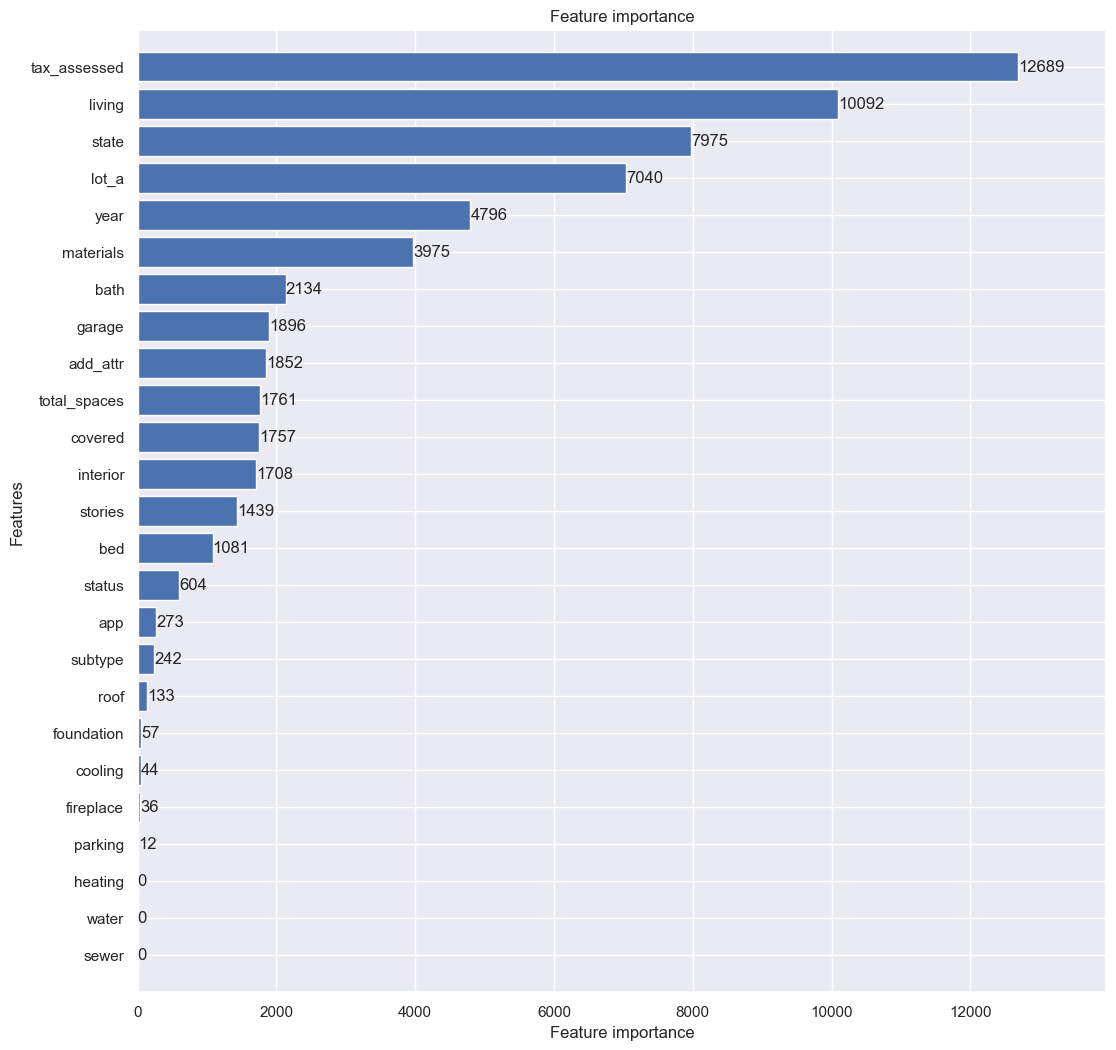

In [65]:
# Plot LightGBM feature importance
lgb.plot_importance(model, height=0.8, figsize=(12.5, 12.5), ignore_zero=False);

In [72]:
lgb_train_set = lgb.Dataset(X_train, label=y_train, feature_name=feature_names)
print("lgb_X: {}".format(X_train.shape))
print("lgb_y: {}".format(y_train.shape))

#del params['early_stopping_rounds']
#del params['feature_fraction_seed']
#del params['bagging_seed']
params['num_boost_round'] = 2500

# Train multiple models
bags = 20
models = []
for i in range(bags):
    print("Start training model {}".format(i))
    params['seed'] = i
    np.random.seed(42)
    random.seed(10)
    model = lgb.train(params, lgb_train_set, verbose_eval=False, categorical_feature=categorical_indices)
    models.append(model)
    
# Sanity check (make sure scores on a small portion of the dataset are reasonable)
for i, model in enumerate(models):
    print("model {}: {}".format(i, abs(model.predict(X_val).reshape(-1,1) - y_val).mean()))

# Save the trained models to disk
# save_models(models)

# models = load_models(['checkpoints/lgb_' + str(i) for i in range(5)])  # load pretrained models

lgb_X: (9067, 25)
lgb_y: (9067, 1)
Start training model 0
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001883 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1609
[LightGBM] [Info] Number of data points in the train set: 9067, number of used features: 23
[LightGBM] [Info] Start training from score 450397.639131
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

/Users/charles/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning:

Found `num_boost_round` in params. Will use it instead of argument

/Users/charles/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1705: UserWarning:

categorical_feature in Dataset is overridden.
New categorical_feature is [0, 1, 2, 8, 9, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24]



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [74]:
for i, model in enumerate(models):
    print("model {}: {}".format(i, abs(model.predict(X_val).reshape(-1,1) - y_val).mean()))

model 0: price    69876.313477
dtype: float64
model 1: price    69884.860767
dtype: float64
model 2: price    69880.204048
dtype: float64
model 3: price    69903.071451
dtype: float64
model 4: price    70075.85279
dtype: float64
model 5: price    69656.119764
dtype: float64
model 6: price    70052.481766
dtype: float64
model 7: price    69866.1931
dtype: float64
model 8: price    69552.778165
dtype: float64
model 9: price    69656.851976
dtype: float64
model 10: price    69698.709437
dtype: float64
model 11: price    69982.871166
dtype: float64
model 12: price    70080.105515
dtype: float64
model 13: price    69751.196483
dtype: float64
model 14: price    70027.291593
dtype: float64
model 15: price    69997.71104
dtype: float64
model 16: price    70042.802093
dtype: float64
model 17: price    70082.488012
dtype: float64
model 18: price    70200.329339
dtype: float64
model 19: price    69882.093531
dtype: float64


In [ ]:
def predict_and_export(models, features, file_name):
    # Construct DataFrame for prediction results
    catboost = pd.DataFrame()

    catboost['Index'] = features.index
    
    test_features = catboost_drop_features(features)
    
    pred = []
    for i, model in enumerate(models):
        print("Start model {}".format(i))
        pred.append(model.predict(test_features))
    
    # Take average across all models
    mean_pred = np.mean(pred, axis=0)
    
    catboost['price'] = [float(format(x, '.4f')) for x in mean_pred]    
    
    print("Length of submission DataFrame: {}".format(len(catboost)))
    print("Submission header:")
    print(catboost.head())
    #catboost.to_csv(file_name, index=False)
    return catboost, pred  # Return the results so that we can analyze or sanity check it

In [75]:
file_name = "/Users/charles/Desktop/DSAI/6_DataScience/project/DSP/20221/data/final_lgbm_ensemble_x20-2500.csv"
lgbm, pred = predict_and_export(models, X_val, file_name)
lgbm.head()

Start model 0
Start model 1
Start model 2
Start model 3
Start model 4
Start model 5
Start model 6
Start model 7
Start model 8
Start model 9
Start model 10
Start model 11
Start model 12
Start model 13
Start model 14
Start model 15
Start model 16
Start model 17
Start model 18
Start model 19
Length of submission DataFrame: 1008
Submission header:
   Index        price
0   5517  918165.1592
1    463  635789.7444
2  13320  346226.6625
3   1992  431079.6551
4     42  568580.0214


Index        price
0   5517  918165.1592
1    463  635789.7444
2  13320  346226.6625
3   1992  431079.6551
4     42  568580.0214

In [224]:
lgb_x20 = pd.read_csv('/Users/charles/Desktop/DSAI/6_DataScience/project/DSP/20221/data/final_lgbm_ensemble_x20-2500.csv')
catboost_x20 = pd.read_csv('/Users/charles/Desktop/DSAI/6_DataScience/project/DSP/20221/data/final_catboost_ensemble_x20-2500.csv')
print("Finished Loading the prediction results.")

weight = 0.9
stack = pd.DataFrame()
stack['Index'] = lgb_x20['Index']
col = "price"
stack[col]= weight * catboost_x20[col] + (1 - weight) * lgb_x20[col]
stack[col] = stack[col].astype("int32")
stack.rename({'price': 'price_predicted'}, axis =1, inplace=True)
predicted = pd.DataFrame(stack["price_predicted"]).copy()
predicted.head()

y_val = y_val.astype("int32")
y_val.rename({'price': 'priceGT'}, axis =1, inplace=True)

#stack.to_csv('/Users/charles/Desktop/iFixerup/zr1/submission/final_stack.csv', index=False)

Finished Loading the prediction results.


In [225]:
result = pd.DataFrame(abs(stack["price_predicted"].values.reshape(-1,1) - y_val).astype(int))
result.describe()

priceGT
count    1008.000000
mean    60808.436508
std     62782.225057
min        56.000000
25%     17971.500000
50%     39897.500000
75%     83581.500000
max    546769.000000

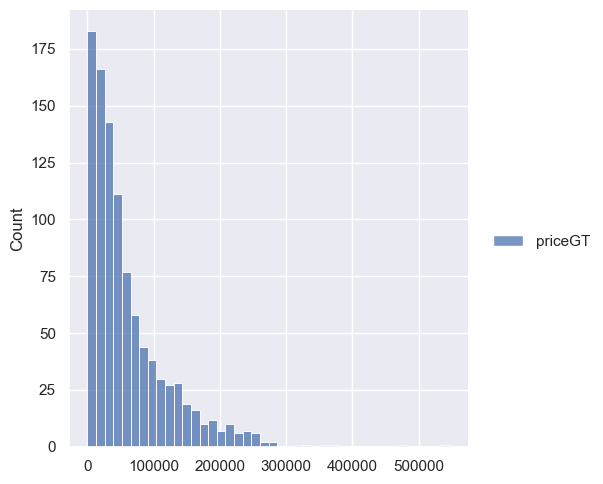

In [226]:
sns.displot(result)

In [227]:
stack.to_csv('/Users/charles/Desktop/DSAI/6_DataScience/project/DSP/20221/data/final_stack.csv', index=False)